In [1]:
!pip install spacy
!pip install numpy
!pip install pandas
!pip install re
!pip install matplotlib
!pip install wordcloud
!pip install gensim
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install nltk
!python -m spacy download en_core_web_sm
!pip install transformers torch



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip i

In [2]:
pip install ntscraper


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import spacy
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import pandas as pd
import json
import nltk


from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from ntscraper import Nitter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from gensim.models import Word2Vec
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

2024-08-18 22:45:38.334910: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# loading Data 

In [4]:
bbc_df = pd.read_csv("bbc.csv")
cnn_df = pd.read_csv("cnn.csv")

In [5]:
bbc_df.head()
type(bbc_df)

pandas.core.frame.DataFrame

In [6]:
cnn_df.head()

,link,text,date,No_of_Likes,No_of_Retweets
0,https://twitter.com/CNN/status/182480092970029...,Blaze erupts at London's historic Somerset Hou...,"Aug 17, 2024 · 1:30 PM UTC",143,37
1,https://twitter.com/CNN/status/182455258305204...,A federal judge has temporarily blocked the la...,"Aug 16, 2024 · 9:03 PM UTC",140,31
2,https://twitter.com/CNN/status/182454960741145...,The US is seeing its largest summer Covid-19 w...,"Aug 16, 2024 · 8:51 PM UTC",525,287
3,https://twitter.com/CNN/status/182453170613874...,"Susan Lorincz, the White woman who fatally sho...","Aug 16, 2024 · 7:40 PM UTC",990,174
4,https://twitter.com/CNN/status/182424532686310...,Four men have been arrested in connection with...,"Aug 16, 2024 · 12:42 AM UTC",350,79


# bulding corpus

In [7]:
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

bbc_corpus = [remove_urls(text) for text in bbc_df['text']]
cnn_corpus = [remove_urls(text) for text in cnn_df['text']]

# Data Pre processing 

In [8]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English language model
nlp = spacy.load('en_core_web_sm')

def process_corpus(nlp, corpus):
    return [nlp(sentence) for sentence in corpus]

def tokenize_sentences(processed_corpus):
    return [
        [token for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
        for sentence in processed_corpus
    ]

def lemmatize_tokens(tokens, stop_words=None):
    if stop_words is None:
        stop_words = STOP_WORDS

    return {
        token.lemma_
        for sentence in tokens
        for token in sentence
        if token.text.lower() not in stop_words
    }


# BBC

In [9]:
bbc_processed_corpus = process_corpus(nlp, bbc_corpus)
bbc_tokens = tokenize_sentences(bbc_processed_corpus)
bbc_lemmas = lemmatize_tokens(bbc_tokens)
display(bbc_lemmas)

{'Gvardiol',
 'Wright',
 'hiatus',
 'superstar',
 'net',
 'List',
 'commentator',
 'celebs',
 'cosy',
 'Hannah',
 'boxer',
 'dramatic',
 '@bbclater',
 'Dec',
 'Chair',
 'Forsyth',
 '🥳',
 'Herron',
 'bring',
 'sell',
 'Gavin',
 'Townsend',
 'instantly',
 'replacement',
 'combine',
 'home',
 'microphone',
 'channel',
 '@annabel_croft',
 'Alessia',
 'multiple',
 'significant',
 'Broadcast',
 'embrace',
 'Ellen',
 '54.3',
 'Language',
 'civilian',
 'bbcboxe',
 'Peter',
 'dnafamilysecret',
 'ULTIMATE',
 'Mervin',
 'rugby',
 'Bruce',
 'hide',
 'Don',
 'UTD',
 'steady',
 'newscast',
 'Boiling',
 'turf',
 'bbcworldcup',
 'Farewell',
 'Blackburn',
 'loveinwar',
 'naan',
 'disappointing',
 'child',
 'stir',
 'Cattermole',
 'UK',
 'polarised',
 'w',
 'Games',
 'betrayal',
 'DUNDEE',
 '89th',
 'Coombes',
 'Lights',
 'Tom',
 'Coughlan',
 'compare',
 'interesting',
 'settle',
 'FINISH',
 'performance',
 '🎧',
 'Betty',
 'Val',
 'challenge',
 '@BBCNews',
 'memory',
 'awful',
 'Traitor',
 'XI',
 'inter

# CNN

In [10]:
cnn_processed_corpus =process_corpus(nlp, cnn_corpus)
cnn_tokens = tokenize_sentences(cnn_processed_corpus)
cnn_lemmas = lemmatize_tokens(cnn_tokens)
display(cnn_lemmas)

{'hiatus',
 'superstar',
 'Caicos',
 'Nobel',
 'commentator',
 'Boeing',
 'boxer',
 'dramatic',
 'remote',
 'enforcement',
 'dismissal',
 'Chair',
 'Ortberg',
 'resilient',
 'Omar',
 'cut',
 'bring',
 'Delta',
 'sell',
 'lady',
 'deni',
 'idf',
 'Gavin',
 'notorious',
 'recount',
 'resort',
 'home',
 'stun',
 'therapist',
 'channel',
 'previous',
 'multiple',
 'significant',
 'Johnny',
 'maintain',
 'ultra',
 '34',
 'Boar',
 'Empire',
 'heir',
 'closing',
 'Peter',
 'Morehouse',
 'hide',
 'abruptly',
 'steady',
 'Arbitration',
 'coast',
 'Capitol',
 'mistakenly',
 'disappointing',
 'Aileen',
 'child',
 'lawmaker',
 'Post',
 'UK',
 'silence',
 'aircraft',
 'Games',
 'Biden',
 'respond',
 'western',
 'Clooney',
 'Merchan',
 'settle',
 'performance',
 'significantly',
 'challenge',
 'fast',
 'grant',
 'justice',
 'worsen',
 'information',
 '737',
 'g7',
 'conversation',
 'Buhle',
 'long',
 '6th',
 'emergency',
 'injure',
 'court',
 'voter',
 '100',
 'adopt',
 'dozen',
 'Somerset',
 'unscr

# TF IDF
The tf_idf function we created calculates the importance of words in a corpus using TF-IDF. It processes the text to remove common stop words, computes the term frequencies, and then sorts the results to highlight the most relevant words across all documents.

In [11]:
def tf_idf(corpus: list[str]):

    # Initialize the vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Fit and transform the corpus
    X = vectorizer.fit_transform(corpus)

    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Sum the TF scores for each word across all documents
    tf_scores = np.sum(X.toarray()/vectorizer.idf_, axis=0)

    # Create a DataFrame for better visualization
    tf_df = pd.DataFrame({'word': feature_names, 'tf_score': tf_scores})

    # Sort the DataFrame by TF-IDF score in descending order
    tf_df = tf_df.sort_values(by='tf_score', ascending=False)

    # Display the most frequent words based on TF-IDF scores
    return tf_df

In [12]:
bbc_tf=tf_idf(bbc_lemmas)
cnn_tf=tf_idf(cnn_lemmas)


In [13]:
cnn_tf

,word,tf_score
0,000,1.305056
77,600,0.354179
5,11,0.343159
625,civil,0.247310
724,constitution,0.247310
...,...,...
106,99,0.086727
663,com,0.085273
769,covid,0.085273
2698,sha,0.083263


In [14]:
bbc_tf

,word,tf_score
349,bbc,3.177257
3270,uk,2.145278
2067,mediacentre,1.668300
44,2024,1.116483
43,2023,0.693297
...,...,...
2,03,0.070725
455,bitly,0.066730
3486,ws,0.066730
248,ap8n,0.066730


# Bar Chart Display

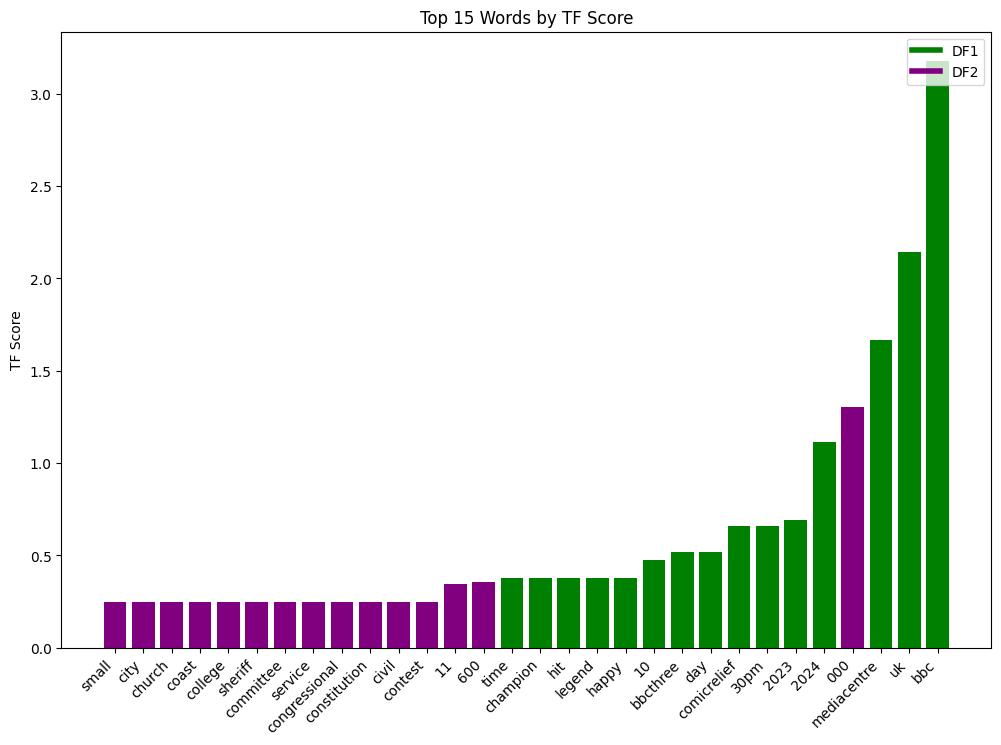

In [15]:
def plot_tfidf_bar_chart(tf_df1, tf_df2, top_n=10):
    top_tf_df1 = tf_df1.head(top_n)
    top_tf_df2 = tf_df2.head(top_n)
    combined_df = pd.concat([top_tf_df1, top_tf_df2])
    combined_df['source'] = ['DF1']*top_n + ['DF2']*top_n
    combined_df = combined_df.sort_values(by='tf_score', ascending=True)  # Sort for vertical bars

    plt.figure(figsize=(12, 8))
    colors = ['green' if source == 'DF1' else 'purple' for source in combined_df['source']]
    plt.bar(combined_df['word'], combined_df['tf_score'], color=colors)
    plt.ylabel('TF Score')
    plt.title(f'Top {top_n} Words by TF Score')
    plt.xticks(rotation=45, ha='right')

    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='green', lw=4, label='DF1'),
                       Line2D([0], [0], color='purple', lw=4, label='DF2')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.show()

plot_tfidf_bar_chart(bbc_tf, cnn_tf, top_n=15)


# Word Cloud Chart

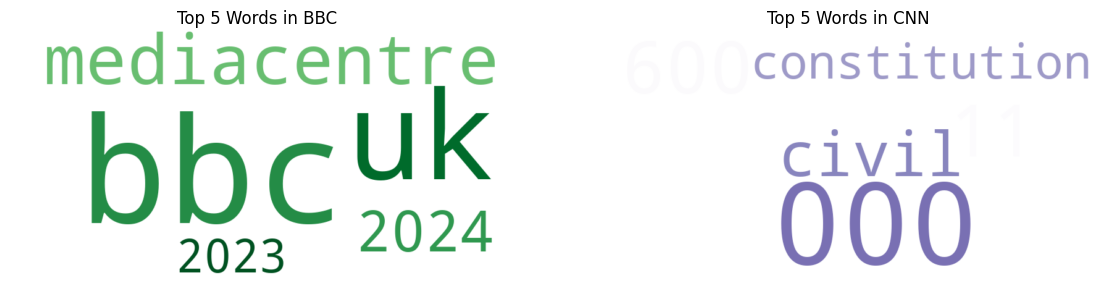

In [16]:
def plot_word_clouds(tf_df1, tf_df2, top_n=5):
    # Get the top N words by TF score for each DataFrame
    top_tf_df1 = tf_df1.head(top_n)
    top_tf_df2 = tf_df2.head(top_n)
    
    # Create dictionaries for word cloud generation
    word_freq1 = dict(zip(top_tf_df1['word'], top_tf_df1['tf_score']))
    word_freq2 = dict(zip(top_tf_df2['word'], top_tf_df2['tf_score']))
    
    # Create word clouds with updated colors and borders
    wordcloud1 = WordCloud(width=800, height=400, background_color='white', colormap='Greens', contour_color='black', contour_width=3).generate_from_frequencies(word_freq1)
    wordcloud2 = WordCloud(width=800, height=400, background_color='white', colormap='Purples', contour_color='black', contour_width=3).generate_from_frequencies(word_freq2)
    
    # Plot word clouds
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top {top_n} Words in BBC')
    
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud2, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top {top_n} Words in CNN')
    
    plt.show()

plot_word_clouds(bbc_tf, cnn_tf, top_n=5)


# Word2Vec
Here we identifie and display the most frequent words in a text corpus using Word2Vec. The get_top_n_frequent_words function trains a Word2Vec model, extracts word frequencies, and returns the top N most common words. 

In [17]:
def get_top_n_frequent_words(token_list, n=10, vector_size=100, window=5, min_count=1, workers=4):
    # Train the Word2Vec model on the tokenized text
    model = Word2Vec(sentences=[[token.text for token in doc] for doc in token_list], 
                     vector_size=vector_size, window=window, 
                     min_count=min_count, workers=workers)
    
    # Extract vocabulary and their counts from the model
    word_counts = {word: model.wv.get_vecattr(word, "count") for word in model.wv.key_to_index}
    
    # Sort words by frequency in descending order and get the top N
    most_frequent_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:n]
    
    return most_frequent_words, model


def display_top_n_frequent_words(token_list, top_n=5):
    # Retrieve the top N most frequent words and the trained model
    top_words, model = get_top_n_frequent_words(token_list, n=top_n)
    
    # Display the top N most frequent words
    print(f"\nTop {top_n} Most Frequent Words:")
    for word, count in top_words:
        print(f'Word: {word}, Frequency: {count}')
    
    return model, [word.lower() for word, _ in top_words]


In [18]:

w2v_model_bbc, bbc_w2v_most_frequent_words = display_top_n_frequent_words(bbc_tokens, top_n=20)

18-Aug-24 22:45:55 - collecting all words and their counts
18-Aug-24 22:45:55 - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
18-Aug-24 22:45:55 - collected 4757 word types from a corpus of 14865 raw words and 835 sentences
18-Aug-24 22:45:55 - Creating a fresh vocabulary
18-Aug-24 22:45:55 - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 4757 unique words (100.00% of original 4757, drops 0)', 'datetime': '2024-08-18T22:45:55.357599', 'gensim': '4.3.3', 'python': '3.12.3 (main, May 14 2024, 22:06:10) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-14.5-x86_64-i386-64bit', 'event': 'prepare_vocab'}
18-Aug-24 22:45:55 - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 14865 word corpus (100.00% of original 14865, drops 0)', 'datetime': '2024-08-18T22:45:55.358577', 'gensim': '4.3.3', 'python': '3.12.3 (main, May 14 2024, 22:06:10) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-14.5-x86_64-i386-64bit', 'event': 'pre

In [19]:
w2v_model_cnn, cnn_w2v_most_frequent_words = display_top_n_frequent_words(cnn_tokens, top_n=20)


18-Aug-24 22:45:55 - collecting all words and their counts
18-Aug-24 22:45:55 - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
18-Aug-24 22:45:55 - collected 4304 word types from a corpus of 12265 raw words and 850 sentences
18-Aug-24 22:45:55 - Creating a fresh vocabulary
18-Aug-24 22:45:55 - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 4304 unique words (100.00% of original 4304, drops 0)', 'datetime': '2024-08-18T22:45:55.534615', 'gensim': '4.3.3', 'python': '3.12.3 (main, May 14 2024, 22:06:10) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-14.5-x86_64-i386-64bit', 'event': 'prepare_vocab'}
18-Aug-24 22:45:55 - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 12265 word corpus (100.00% of original 12265, drops 0)', 'datetime': '2024-08-18T22:45:55.535403', 'gensim': '4.3.3', 'python': '3.12.3 (main, May 14 2024, 22:06:10) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-14.5-x86_64-i386-64bit', 'event': 'pre

# AutoEncoder 
In the cell below identifies important words in a text by using an autoencoder. It trains the autoencoder on Word2Vec embeddings and then calculates how well each word can be reconstructed. Words with higher errors are considered more significant, as they are harder to accurately represent. The function returns the top N words with the highest errors, helping to highlight key terms in the text.

In [20]:
def autoencoder_significance_analysis(w2v_model, tokenized_corpus, top_n=10):
    
    # Create word embeddings for each word in the corpus
    word_embeddings = {}
    for doc in tokenized_corpus:
        for word in doc:
            if word not in word_embeddings:
                word_embeddings[word.text] = w2v_model.wv[word.text]

    # Convert word embeddings to a list
    embedding_list = list(word_embeddings.values())
    embedding_matrix = np.array(embedding_list)

    # Define the autoencoder
    input_dim = embedding_matrix.shape[1]
    encoding_dim = 32

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='linear')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder
    autoencoder.fit(embedding_matrix, embedding_matrix, epochs=100, batch_size=16, shuffle=True, verbose=0)

    # Get the reconstructed embeddings
    reconstructed_embeddings = autoencoder.predict(embedding_matrix)

    # Calculate reconstruction error for each word
    reconstruction_errors = np.mean(np.square(embedding_matrix - reconstructed_embeddings), axis=1)

    # Create a dictionary of words and their reconstruction errors
    word_errors = {word: error for word, error in zip(word_embeddings.keys(), reconstruction_errors)}

    # Sort words by reconstruction error (higher error might indicate more significant words)
    sorted_words = sorted(word_errors.items(), key=lambda x: x[1], reverse=True)

    # Print the top 10 words with highest reconstruction error
    print(f"\nTop {top_n} potentially significant words based on reconstruction error:\n")
    for word, error in sorted_words[:top_n]:
        print(f"{word}: {error}")
    
    return [item[0].lower() for item in sorted_words[:top_n]]

In [21]:
bbc_ae_significant_words = autoencoder_significance_analysis(w2v_model_bbc, bbc_tokens, top_n=20)
cnn_ae_significant_words=autoencoder_significance_analysis(w2v_model_cnn, cnn_tokens, top_n=20)

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step

Top 20 potentially significant words based on reconstruction error:

ENG: 5.014358612243086e-05
World: 4.668474502977915e-05
celebrity: 4.618524690158665e-05
hope: 4.546362833934836e-05
iPlayer: 4.502282172325067e-05
Cup: 4.4895699829794466e-05
AGoodGirlsGuidetoMurder: 4.374930722406134e-05
@BBCBreakfast: 4.372742841951549e-05
Lionesses: 4.360248931334354e-05
Come: 4.354312477516942e-05
story: 4.322520544519648e-05
confirmed: 4.304574758862145e-05
👏: 4.29054161941167e-05
Chart: 4.2841922549996525e-05
December: 4.260193964000791e-05
Dancing: 4.2541920265648514e-05
Veterans: 4.22823904955294e-05
courage: 4.221364724799059e-05
wrote: 4.22016964876093e-05
📞: 4.188907769275829e-05
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step

Top 20 potentially significant words based on reconstruction error:

Court: 5.223116386332549e-05
Supreme: 5.003226760891266e-05
hush: 4.5117387344362214e-05
Follow: 4.510099461185746e-05
money: 4.4582524424185976e-05
honor: 4.

cnn_ae_significant_words = autoencoder_significance_analysis(w2v_model_cnn, cnn_tokens, top_n=20)

# Comparing

Here we compares the top words identified by TF-IDF and an autoencoder for both BBC and CNN datasets. We checks for common and unique words between the two methods and visualizes the results using word clouds.

In [22]:
def compare_results(bbc_significance, cnn_significance, bbc_tf_df, cnn_tf_df, top_n=10):
 
    # Get top N words from TF-IDF for BBC and CNN
    bbc_top_words_tf = set(bbc_tf_df.head(top_n)['word'])
    cnn_top_words_tf = set(cnn_tf_df.head(top_n)['word'])

    # Get top N significant words from autoencoder for BBC and CNN
    bbc_top_words_autoencoder = set(bbc_significance)
    cnn_top_words_autoencoder = set(cnn_significance)

    # Find common and unique words
    common_words_bbc = bbc_top_words_tf.intersection(bbc_top_words_autoencoder)
    common_words_cnn = cnn_top_words_tf.intersection(cnn_top_words_autoencoder)
    unique_words_bbc = bbc_top_words_tf.symmetric_difference(bbc_top_words_autoencoder)
    unique_words_cnn = cnn_top_words_tf.symmetric_difference(cnn_top_words_autoencoder)

    # Print comparisons
    print(f"\nCommon Top Words in BBC (TF-IDF and Autoencoder):\n{common_words_bbc}")
    print(f"Unique Top Words in BBC (TF-IDF only):\n{bbc_top_words_tf - bbc_top_words_autoencoder}")
    print(f"Unique Top Words in BBC (Autoencoder only):\n{bbc_top_words_autoencoder - bbc_top_words_tf}")
    
    print(f"\nCommon Top Words in CNN (TF-IDF and Autoencoder):\n{common_words_cnn}")
    print(f"Unique Top Words in CNN (TF-IDF only):\n{cnn_top_words_tf - cnn_top_words_autoencoder}")
    print(f"Unique Top Words in CNN (Autoencoder only):\n{cnn_top_words_autoencoder - cnn_top_words_tf}")

    # Create word clouds for the top N words from TF-IDF and Autoencoder for BBC and CNN
    def generate_wordcloud(words, title):
        word_freq = dict(zip(words, [1] * len(words)))  # Frequency is set to 1 for visualization
        wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='black', contour_width=10).generate_from_frequencies(word_freq)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
    
    plt.figure(figsize=(14, 14))

    plt.subplot(2, 2, 1)
    generate_wordcloud(bbc_top_words_tf, 'BBC Top Words (TF-IDF)')

    plt.subplot(2, 2, 2)
    generate_wordcloud(bbc_top_words_autoencoder, 'BBC Top Words (Autoencoder)')

    plt.subplot(2, 2, 3)
    generate_wordcloud(cnn_top_words_tf, 'CNN Top Words (TF-IDF)')

    plt.subplot(2, 2, 4)
    generate_wordcloud(cnn_top_words_autoencoder, 'CNN Top Words (Autoencoder)')

    plt.show()


Common Top Words in BBC (TF-IDF and Autoencoder):
set()
Unique Top Words in BBC (TF-IDF only):
{'2024', 'uk', 'bbc', '10', 'day', 'mediacentre', '2023', 'comicrelief', 'bbcthree', '30pm'}
Unique Top Words in BBC (Autoencoder only):
{'cup', 'confirmed', 'eng', 'hope', 'world', 'courage', '@bbcbreakfast', 'come', 'celebrity', 'dancing', 'chart', '👏', '📞', 'wrote', 'agoodgirlsguidetomurder', 'veterans', 'lionesses', 'iplayer', 'story', 'december'}

Common Top Words in CNN (TF-IDF and Autoencoder):
set()
Unique Top Words in CNN (TF-IDF only):
{'sheriff', 'college', '000', 'congressional', 'constitution', 'service', '11', 'civil', '600', 'committee'}
Unique Top Words in CNN (Autoencoder only):
{'money', 'edging', 'supreme', 'new', 'credit', 'follow', 'hush', 'start', 'assaulting', 'jerusalem', 'embattled', 'terms', 'court', 'j.d.', '9p', 'honor', 'live', 'prime', 'harris', 'minister'}


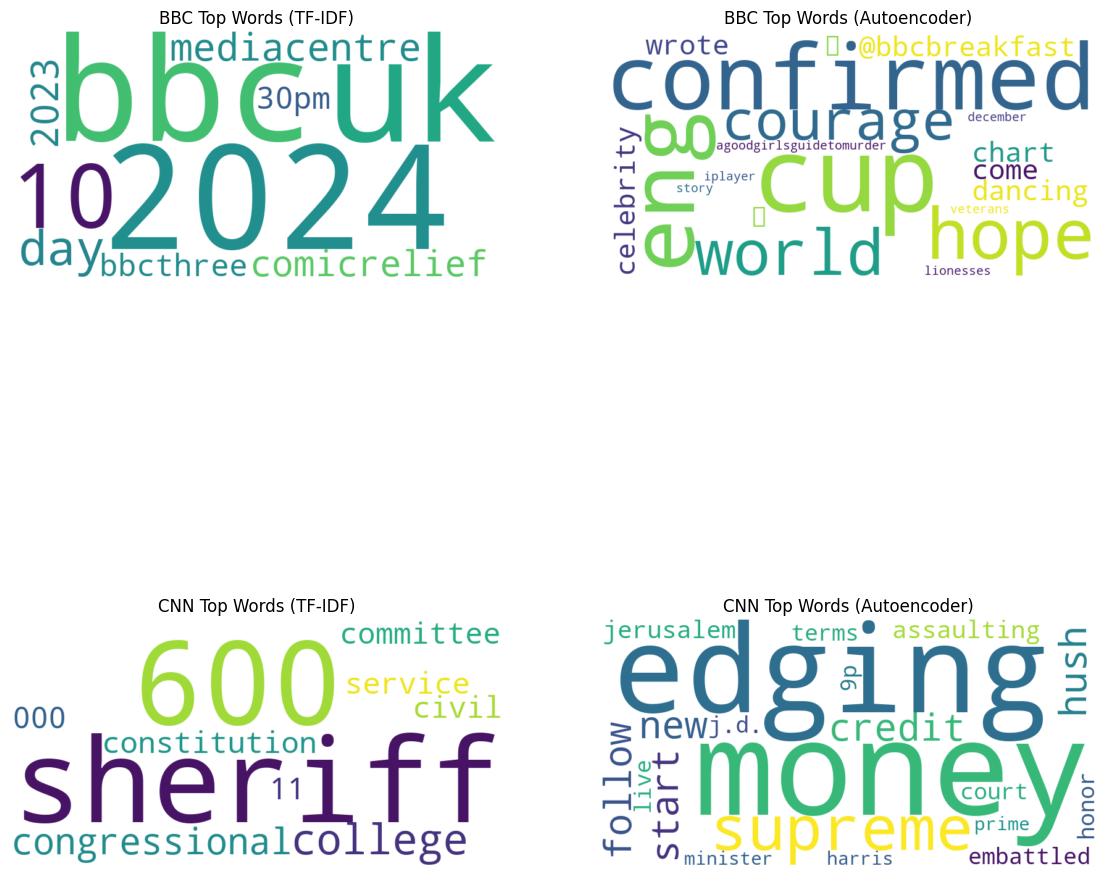

In [23]:
compare_results(bbc_ae_significant_words,cnn_ae_significant_words,bbc_tf,cnn_tf)

# NER
This c processes a text corpus using a spaCy model to identify named entities (NER). It prints the entities found in each document, along with their labels and explanations.

In [24]:
import spacy

def print_NER(corpus, nlp_model):
    # Process the entire corpus
    docs = [nlp_model(doc) for doc in corpus]
    
    # Iterate over processed documents and print entities
    for i, doc in enumerate(docs):
        print(f"\nDocument {i+1}:")
        if doc.ents:
            for ent in doc.ents:
                # Print entity text, label, and explanation
                print(f"Word: {ent.text:<35} NER: {ent.label_:<10} Explanation: {spacy.explain(ent.label_)}")


In [25]:
print_NER(bbc_corpus ,nlp)


Document 1:
Word: Asha Banks                          NER: PERSON     Explanation: People, including fictional
Word: A Good Girl's                       NER: PRODUCT    Explanation: Objects, vehicles, foods, etc. (not services)
Word: Asha Banks                          NER: ORG        Explanation: Companies, agencies, institutions, etc.
Word: #AGoodGirlsGuidetoMurder            NER: MONEY      Explanation: Monetary values, including unit

Document 2:
Word: Emma Myers                          NER: PERSON     Explanation: People, including fictional
Word: Ravi                                NER: PRODUCT    Explanation: Objects, vehicles, foods, etc. (not services)
Word: #                                   NER: CARDINAL   Explanation: Numerals that do not fall under another type

Document 3:
Word: Pip (Emma Myers                     NER: PERSON     Explanation: People, including fictional
Word: Max                                 NER: PERSON     Explanation: People, including fictional
W

In [26]:
print_NER(cnn_corpus ,nlp)


Document 1:
Word: London                              NER: GPE        Explanation: Countries, cities, states
Word: Somerset House                      NER: FAC        Explanation: Buildings, airports, highways, bridges, etc.
Word: around 100                          NER: CARDINAL   Explanation: Numerals that do not fall under another type
Word: 15                                  NER: CARDINAL   Explanation: Numerals that do not fall under another type

Document 2:
Word: Venu Sports                         NER: ORG        Explanation: Companies, agencies, institutions, etc.
Word: Warner Bros. Discovery              NER: ORG        Explanation: Companies, agencies, institutions, etc.
Word: Disney                              NER: ORG        Explanation: Companies, agencies, institutions, etc.
Word: Fox Corporation                     NER: ORG        Explanation: Companies, agencies, institutions, etc.

Document 3:
Word: US                                  NER: GPE        Explanation: C

# EDA
We plots the average number of tweets, likes, and retweets per hour from a given dataset.  processes the data to ensure correct formatting and then generates a bar chart to visualize the activity patterns throughout the day.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_hourly_metrics(df, df_name):
    """Plot the average number of tweets, likes, and retweets per hour from the given DataFrame."""
    
    # Convert 'date' to datetime format
    df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y · %I:%M %p UTC', errors='coerce')
    df = df.dropna(subset=['date'])

    # Check for required columns
    if not all(col in df.columns for col in ['No_of_Likes', 'No_of_Retweets']):
        print(f"Missing necessary columns.")
        return

    # Extract hour from 'date'
    df['hour'] = df['date'].dt.hour

    # Calculate averages and counts per hour
    avg_likes_per_hour = df.groupby('hour')['No_of_Likes'].mean().reindex(range(24), fill_value=0)
    avg_retweets_per_hour = df.groupby('hour')['No_of_Retweets'].mean().reindex(range(24), fill_value=0)
    avg_posts_per_hour = df.groupby('hour').size().reindex(range(24), fill_value=0)

    # Reorder hours for plotting
    hours_order = list(range(1, 24)) + [0]
    avg_likes_per_hour = avg_likes_per_hour.reindex(hours_order)
    avg_retweets_per_hour = avg_retweets_per_hour.reindex(hours_order)
    avg_posts_per_hour = avg_posts_per_hour.reindex(hours_order)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(avg_likes_per_hour.index - 0.2, avg_likes_per_hour, width=0.2, color='green', label='Likes')
    plt.bar(avg_retweets_per_hour.index, avg_retweets_per_hour, width=0.2, color='blue', label='Retweets')
    plt.bar(avg_posts_per_hour.index + 0.2, avg_posts_per_hour, width=0.2, color='red', label='Posts')

    plt.title(f'Average Number of Likes, Retweets, and Posts Per Hour - {df_name}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Count')
    plt.xticks(ticks=range(24), labels=[f"{hour:02d}:00" for hour in hours_order])
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
# plot_hourly_metrics(bbc_df, 'BBC')
# plot_hourly_metrics(cnn_df, 'CNN')


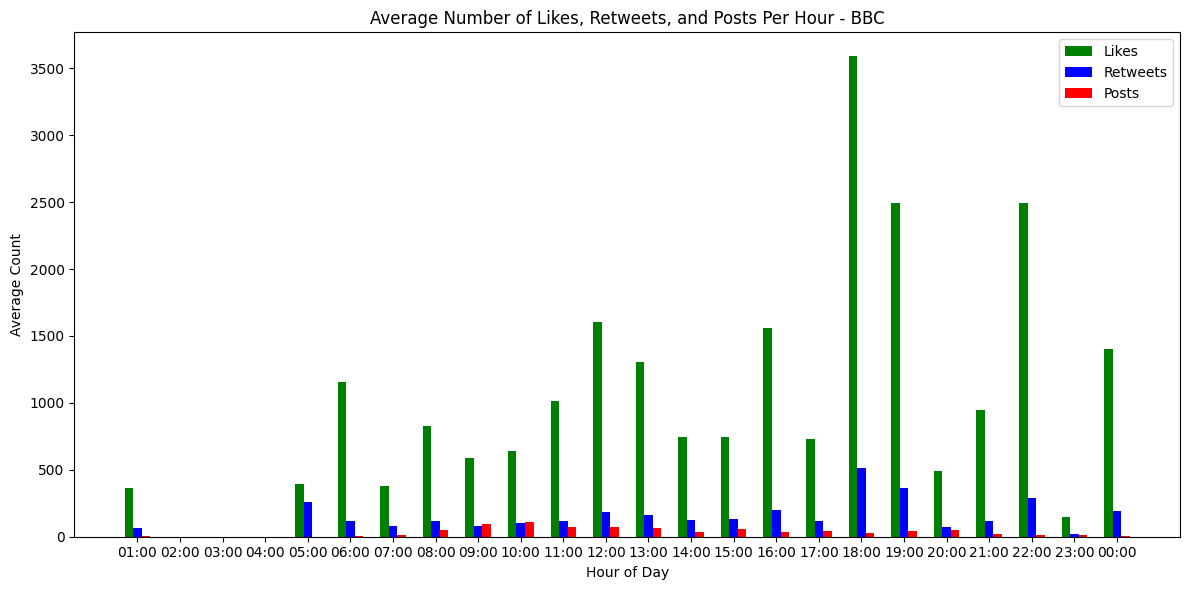

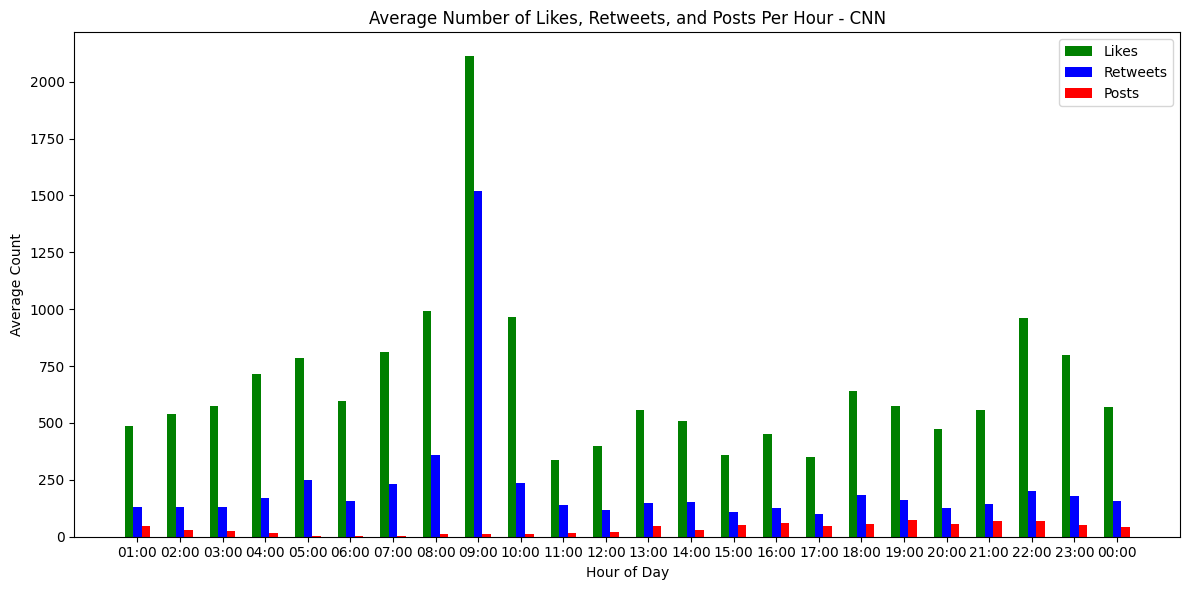

In [28]:
bbc_df = pd.read_csv('bbc.csv')
cnn_df = pd.read_csv('cnn.csv')
plot_hourly_metrics(bbc_df, 'BBC')
plot_hourly_metrics(cnn_df, 'CNN')

#  Analysis Sentiment 

In [29]:
!pip install textblob


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [30]:
from textblob import TextBlob
import matplotlib.pyplot as plt

def analyze_sentiment(text):
    """Returns the sentiment of the text as positive, negative, or neutral."""
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

def sent_analysis(corpus1, user1, corpus2, user2):
    """Analyzes and compares sentiment in two corpora and visualizes the results."""
    # Analyze sentiment for each corpus
    sentiments1 = [analyze_sentiment(text) for text in corpus1]
    sentiments2 = [analyze_sentiment(text) for text in corpus2]
    
    # Count positive and negative sentiments
    positive_counts = [sentiments1.count('positive'), sentiments2.count('positive')]
    negative_counts = [sentiments1.count('negative'), sentiments2.count('negative')]

    # Plotting the results
    labels = [user1, user2]
    x = range(len(labels))

    fig, ax = plt.subplots()
    bar_width = 0.35

    ax.bar(x, positive_counts, bar_width, color='b', label='Positive')
    ax.bar([p + bar_width for p in x], negative_counts, bar_width, color='r', label='Negative')

    ax.set_xlabel('Users')
    ax.set_ylabel('Counts')
    ax.set_title('Sentiment Analysis')
    ax.set_xticks([p + bar_width / 2 for p in x])
    ax.set_xticklabels(labels)
    ax.legend()

    plt.tight_layout()
    plt.show()


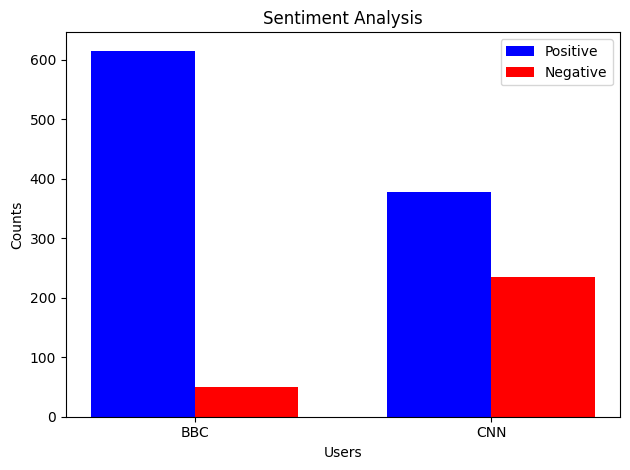

In [31]:
sent_analysis(bbc_corpus, 'BBC', cnn_corpus, 'CNN')


# Summarizer
This cell summarizes text using a pre-trained model from the transformers library. It can summarize individual texts or all texts in a DataFrame column, adjusting the summary length based on the input size

In [32]:
import pandas as pd
import os
from transformers import pipeline

# Ensure fallback for MPS is enabled if needed
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

def summarize_text(text, model_name='facebook/bart-large-cnn', max_length=150, min_length=30, device=-1):
    summarizer = pipeline(
        "summarization",
        model=model_name,
        device=device,
        clean_up_tokenization_spaces=True  # Explicitly set this parameter
    )
    
    # Adjust max_length and min_length based on input length
    input_length = len(text.split())
    effective_max_length = min(max_length, input_length)
    effective_min_length = min(min_length, effective_max_length)

    if effective_max_length <= effective_min_length:
        effective_max_length = effective_min_length + 1  # Ensure max_length is greater than min_length

    summary = summarizer(text, max_length=effective_max_length, min_length=effective_min_length, do_sample=False)
    return summary[0]['summary_text']

def summarize_dataframe(df, text_column, model_name='facebook/bart-large-cnn', max_length=150, min_length=30, device=-1):
    df['summary'] = df[text_column].apply(lambda x: summarize_text(x, model_name, max_length, min_length, device))
    return df


In [33]:
text_column_name = 'text'  # Update this based on your actual DataFrame
# Summarize the DataFrame
bbc_df_summarized = summarize_dataframe(bbc_df, text_column_name, device=-1)  # Use device=-1 for CPU, or device=0 for GPU
print(bbc_df_summarized['summary'])

/Users/omri/Desktop/final nlp project/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/Users/omri/Desktop/final nlp project/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


0      The cast of A Good Girl's Guide to Murder put ...
1      Emma Myers and Zain Iqbal share a kiss. Why am...
2                  Pip (Emma Myers) confronts Max (Henry
3      BBC and ITV confirm deal for UEFA Women's Euro...
4      The Class of 2024 are ready to take to the bal...
                             ...                        
830                       Who's ready for episode 3 of "
831    BBC Young Reporter 2023 is open to 11-18 year ...
832    Anita Dobson and Michelle Greenidge join the n...
833    Anita Dobson and Michelle Greenidge join the n...
834    Inspired by the iconic true story of the Brink...
Name: summary, Length: 835, dtype: object


In [34]:
text_column_name = 'text'  # Update this based on your actual DataFrame

# Summarize the DataFrame
cnn_df_summarized = summarize_dataframe(cnn_df, text_column_name, device=-1)  # Use device=-1 for CPU, or device=0 for GPU
print(cnn_df_summarized['summary'])

/Users/omri/Desktop/final nlp project/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


0      Blaze erupts at London's historic Somerset Hou...
1      A federal judge has temporarily blocked the la...
2      The US is seeing its largest summer Covid-19 w...
3      Susan Lorincz, the White woman who fatally sho...
4      Four men have been arrested in connection with...
                             ...                        
845    Violence breaks out between pro-Palestinian pr...
846    Dozens of people have been detained and loaded...
847    Democrat Tim Kennedy will win a House special ...
848    NYPD officers are moving onto Columbia's campu...
849    Changpeng Zhao, founder of cryptocurrency exch...
Name: summary, Length: 850, dtype: object


In [35]:

combain_corpus = []
combain_corpus.extend(bbc_corpus)
combain_corpus.extend(cnn_corpus)
combain_corpus

["How well do the #AGGGTM gang know Asha Banks?  The cast of A Good Girl's Guide to Murder put their knowledge of Asha Banks to the test.  #AGoodGirlsGuidetoMurder #AGGGTM #AGGGTMSeries #AshaBanks",
 'Why am I blushing? 🤭  Pip (Emma Myers) and Ravi (Zain Iqbal) share a kiss.  #AGoodGirlsGuidetoMurder #AGGGTM #AGGGTMSeries #PipRaviNation #PipRavi',
 'YES PIP 👏   Pip (Emma Myers) confronts Max (Henry Ashton). #AGoodGirlsGuidetoMurder #AGGGTM #AGGGTMSeries',
 '📢 BBC and ITV confirm deal for UEFA Women’s Euro 2025!  Half of the matches will be shown across BBC TV and @BBCiPlayer, with highlights and clips also shown on the @BBCSport website, app and social media platforms  Details ➡️ bbc.co.uk/mediacentre/2024/b…',
 '🪩 And here they are... your #Strictly stars!  The Class of 2024 are ready to take to the ballroom floor when Strictly Come Dancing returns  More ➡️ ',
 '🪩 Can this #Olympics champion master the Quekstep? Sam Quek MBE is the fifteenth and final celebrity confirmed for #Strictly

# RNN

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Combine all documents into a single string
combined_text = ' '.join(combain_corpus)

# Text preprocessing
combined_text = combined_text.lower()  # Convert to lowercase
combined_text = re.sub(r'\s+', ' ', combined_text)  # Replace multiple spaces with a single space
combined_text = re.sub(r'[^\w\s]', '', combined_text)  # Remove punctuation

# Tokenization
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts([combined_text])
total_chars = len(tokenizer.word_index) + 1  # Total number of characters in the tokenizer
sequences = tokenizer.texts_to_sequences([combined_text])[0]

# Create input and target sequences
seq_length = 40  # Length of each sequence
num_sequences = len(sequences) // seq_length

X = np.zeros((num_sequences, seq_length), dtype=int)
y = np.zeros((num_sequences, total_chars), dtype=int)

for i in range(num_sequences):
    X[i] = sequences[i*seq_length:(i+1)*seq_length]
    y[i] = np.zeros(total_chars)
    if i*seq_length + seq_length < len(sequences):
        y[i][sequences[i*seq_length + seq_length]] = 1

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the RNN model
model = Sequential([
    Embedding(input_dim=total_chars, output_dim=128, input_length=seq_length),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(total_chars, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, batch_size=64)


Epoch 1/100


/Users/omri/Desktop/final nlp project/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.1597 - loss: 3.3117
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.1719 - loss: 2.9536
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.1813 - loss: 2.8253
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.2442 - loss: 2.6814
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2591 - loss: 2.5417
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.2710 - loss: 2.4942
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.2796 - loss: 2.4515
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.2789 - loss: 2.4212
Epoch 9/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.3126 - loss: 2.3477
Epoch 10/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.3057 - loss: 2.3431
Epoch 11/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.3208 - loss: 2.3033
Epoch 12/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy:

In [38]:
def generate_text(seed_text, num_chars):
    generated_text = seed_text
    for _ in range(num_chars):
        # Prepare the input sequence
        seed_sequence = tokenizer.texts_to_sequences([seed_text])[-1]
        seed_sequence = np.pad(seed_sequence, (seq_length - len(seed_sequence), 0), mode='constant', constant_values=0)
        seed_sequence = seed_sequence.reshape(1, -1)

        # Predict the next character
        prediction = model.predict(seed_sequence, verbose=0)
        predicted_char_index = np.argmax(prediction)
        predicted_char = tokenizer.index_word.get(predicted_char_index, '')

        # Append the predicted character to the generated text
        generated_text += predicted_char
        seed_text = seed_text[1:] + predicted_char
    
    return generated_text

# Example usage
seed_text = "There's so much"
generated_text = generate_text(seed_text, 20)
print(generated_text)


There's so muching popts tuker by m


# Gpt Model

In [39]:

from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the pad token to be the same as the eos token
tokenizer.pad_token = tokenizer.eos_token

def encode_texts(texts, tokenizer, max_length=512):
    encodings = [tokenizer.encode(text, truncation=True, max_length=max_length, padding='max_length') for text in texts]
    return encodings

# Encode combined corpus
encoded_corpus = encode_texts(combain_corpus, tokenizer)


/Users/omri/Desktop/final nlp project/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [40]:
def generate_text(seed_text, max_length=100, num_return_sequences=1):
    input_ids = tokenizer.encode(seed_text, return_tensors='pt')
    
    # Generate text
    output = model.generate(
        input_ids,
        max_length=max_length + len(input_ids[0]),
        num_return_sequences=num_return_sequences,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=0.95,
        temperature=0.7,
        pad_token_id=tokenizer.eos_token_id  # Use eos_token_id as pad_token_id
    )
    
    # Decode and return text
    generated_texts = [tokenizer.decode(output[i], skip_special_tokens=True) for i in range(num_return_sequences)]
    return generated_texts

# Example usage
seed_text = "There's so much"
generated_texts = generate_text(seed_text, max_length=20, num_return_sequences=1)
print(generated_texts[0])


/Users/omri/Desktop/final nlp project/venv/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/Users/omri/Desktop/final nlp project/venv/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


There's so much to learn about the world of the game, and I'm sure you'll find a lot of great
